<a href="https://colab.research.google.com/github/chaeyeongSon/pdm09/blob/master/py-tensorflow/tf2_4_mnist_FCN_test_ALL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Test of mnist FCN model**
- FCN2
- FCN3
- FCN4
- FCN5

***

![mnist_NN_2_layers](https://raw.githubusercontent.com/Redwoods/Py/master/pdm2020/my-note/py-tensorflow/images/mnist_NN_2_layers.png)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)

2.3.0


## **데이터 로딩, 정규화**

In [2]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0 # 정규화

print("X_train={0}".format(X_train.shape))
print("y_train={0}".format(y_train.shape)) 
print("X_test={0}".format(X_test.shape))
print("y_test={0}".format(y_test.shape))

11493376/11490434 [==============================] - 0s 0us/step
X_train=(60000, 28, 28)
y_train=(60000,)
X_test=(10000, 28, 28)
y_test=(10000,)


In [3]:
# One-Hot-Encoding
# Use function to_categorical() to do One-Hot-Encoding
# tf.keras.utils.to_categorical
from keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## **FCN2**

In [4]:
fcn2 = keras.models.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)), # Flatten - 차원을 1차원으로 바꿔줌 
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

fcn2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [5]:
fcn2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [6]:
fcn2.fit(X_train, y_train, epochs = 20,  batch_size = 32)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3134 - accuracy: 0.9089
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1570 - accuracy: 0.9534
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1184 - accuracy: 0.9642
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1002 - accuracy: 0.9692
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0885 - accuracy: 0.9715
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0772 - accuracy: 0.9753
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0707 - accuracy: 0.9779
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0631 - accuracy: 0.9799
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0574 - accuracy: 0.9812
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.054

In [7]:
fcn2.evaluate(X_test, y_test, batch_size =32)

313/313 [==============================] - 1s 2ms/step - loss: 0.0853 - accuracy: 0.9791


[0.08526559174060822, 0.9790999889373779]

## **FCN3**

In [8]:
fcn3 = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

fcn3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [9]:
fcn3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
________________________________________________

In [10]:
fcn3.fit(X_train,y_train, epochs= 20 , batch_size =32)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2775 - accuracy: 0.9169
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1343 - accuracy: 0.9595
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1033 - accuracy: 0.9682
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0871 - accuracy: 0.9737
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0759 - accuracy: 0.9761
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0677 - accuracy: 0.9794
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0621 - accuracy: 0.9803
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0580 - accuracy: 0.9815
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0520 - accuracy: 0.9833
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.052

In [11]:
fcn3.evaluate(X_test, y_test, batch_size= 32)

313/313 [==============================] - 1s 2ms/step - loss: 0.0854 - accuracy: 0.9825


[0.08536610752344131, 0.9825000166893005]

## **FCN4**

In [12]:
fcn4 = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

fcn4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [13]:
fcn4.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)               

In [14]:
fcn4.fit(X_train, y_train, epochs = 20 , batch_size =32)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3429 - accuracy: 0.8990
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1623 - accuracy: 0.9539
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1289 - accuracy: 0.9628
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1075 - accuracy: 0.9696
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0939 - accuracy: 0.9724
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0845 - accuracy: 0.9759
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0750 - accuracy: 0.9778
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0712 - accuracy: 0.9784
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0641 - accuracy: 0.9808
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.063

In [15]:
fcn4.evaluate(X_test, y_test, batch_size =32)

313/313 [==============================] - 1s 2ms/step - loss: 0.0843 - accuracy: 0.9812


[0.08428774774074554, 0.9811999797821045]

## **FCN5**

In [16]:
fcn5 = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation='relu'),  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

fcn5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [17]:
fcn5.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)               

In [18]:
fcn5.fit(X_train, y_train, epochs=20, batch_size =32)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4523 - accuracy: 0.8703
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2115 - accuracy: 0.9474
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1649 - accuracy: 0.9576
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1374 - accuracy: 0.9651
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1209 - accuracy: 0.9688
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1140 - accuracy: 0.9710
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0997 - accuracy: 0.9733
Epoch 8/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0920 - accuracy: 0.9757
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0858 - accuracy: 0.9781
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.081

In [19]:
fcn5.evaluate(X_test, y_test, batch_size = 32)

313/313 [==============================] - 1s 2ms/step - loss: 0.0800 - accuracy: 0.9835


[0.08003689348697662, 0.9835000038146973]

# **[DIY] Hidden layer에 따른 정확도**

In [20]:
fcn_result = [[0.08526559174060822, 0.9790999889373779], 
 [0.08536610752344131, 0.9825000166893005], 
 [0.08428774774074554, 0.9811999797821045], 
 [0.08003689348697662, 0.9835000038146973]]

In [21]:
# select accuracies
accuracy = [row[1] for row in fcn_result]
accuracy

[0.9790999889373779,
 0.9825000166893005,
 0.9811999797821045,
 0.9835000038146973]

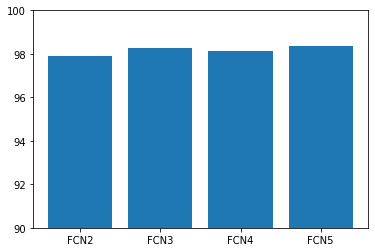

In [22]:
x = np.arange(4)
fcns = ['FCN2','FCN3','FCN4','FCN5']
accuracies = [acc*100 for acc in accuracy] # %

plt.bar(x, accuracies)
plt.xticks(x, fcns)
plt.ylim(90, 100)
plt.show()

## 모형의 저장

- 트레이닝이 끝난 모형은 save 메서드로 가중치와 함께 hdf5 형식으로 저장
- load 명령으로 불러 사용

In [23]:
fcn3.save('fcn3_best.hdf5')

In [24]:
from keras.models import load_model

model2 = load_model('fcn3_best.hdf5')
model2.evaluate(X_test, y_test, batch_size=32)

313/313 [==============================] - 1s 2ms/step - loss: 0.0854 - accuracy: 0.9825


[0.08536610752344131, 0.9825000166893005]

http://life21c.inje.ac.kr:7777